In [1]:
import pandas as pd

In [6]:
data1 = pd.read_csv("apDashboardClientsDetails1.csv",skiprows=1, index_col=False)
data2 = pd.read_csv("apDashboardClientsDetails2.csv",skiprows=1, index_col=False)
#data = pd.concat([data1, data2])

In [7]:
#return distance 
import math
def calculateDistance(signalLevelInDb, freqInMHz):
    if math.fabs(signalLevelInDb)>80:
        # we consider Signal Strength < -80 dBm as disconnected since connection is weak by then.  
        return 0
    else:
        exp = (27.55 - (20 * math.log10(freqInMHz)) + math.fabs(signalLevelInDb)) / 20.0
        return math.pow(10.0, exp)

In [8]:
#group data by ssid(AP), Client(devices) order by date time. 
data = data1.copy()
sp_data = data[['ssid','Client','Date time','channelFreq','signalStrength']]
sp_data = sp_data.groupby(['ssid','Client','Date time']).mean().reset_index()
sp_data.sort_values(['Client','Date time'], ascending=True) 
sp_data

,ssid,Client,Date time,channelFreq,signalStrength
0,APT_4125,2c:59:8a:6b:53:c5,2019-03-23 23:59:31,5240.0,-67.0
1,APT_4125,2c:59:8a:6b:53:c5,2019-03-24 00:00:31,5240.0,-67.0
2,APT_4125,2c:59:8a:6b:53:c5,2019-03-24 00:01:31,5240.0,-67.0
3,APT_4125,2c:59:8a:6b:53:c5,2019-03-24 00:03:01,5240.0,-64.0
4,APT_4125,2c:59:8a:6b:53:c5,2019-03-24 00:04:31,5240.0,-64.0
...,...,...,...,...,...
108091,APT_4840,1c:1e:e3:8c:98:0f,2019-03-24 23:55:01,2462.0,-37.0
108092,APT_4840,1c:1e:e3:8c:98:0f,2019-03-24 23:56:01,2462.0,-37.0
108093,APT_4840,1c:1e:e3:8c:98:0f,2019-03-24 23:57:01,2462.0,-38.0
108094,APT_4840,1c:1e:e3:8c:98:0f,2019-03-24 23:58:01,2462.0,-37.0


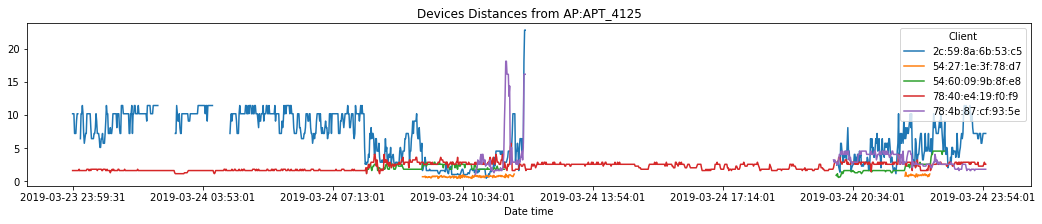

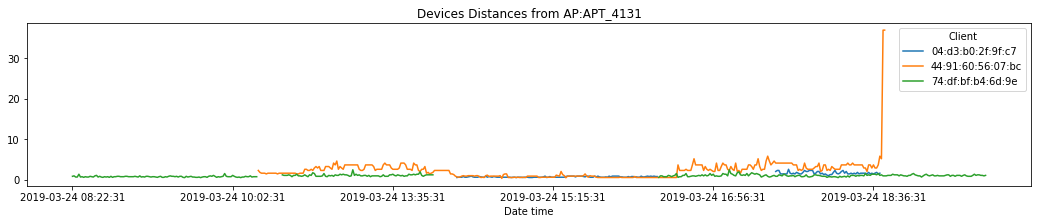

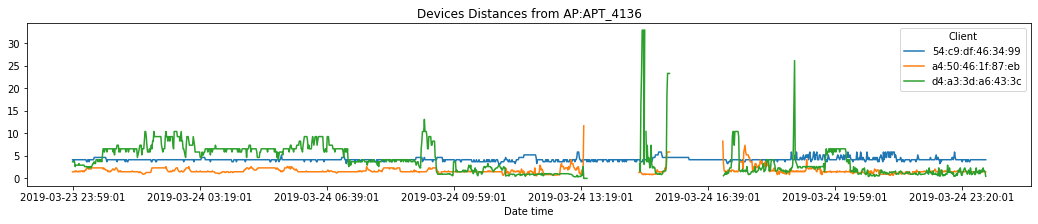

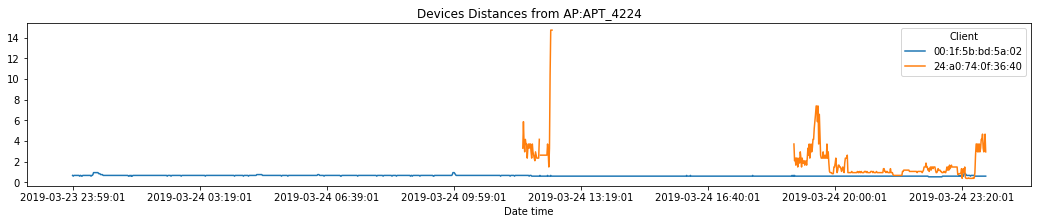

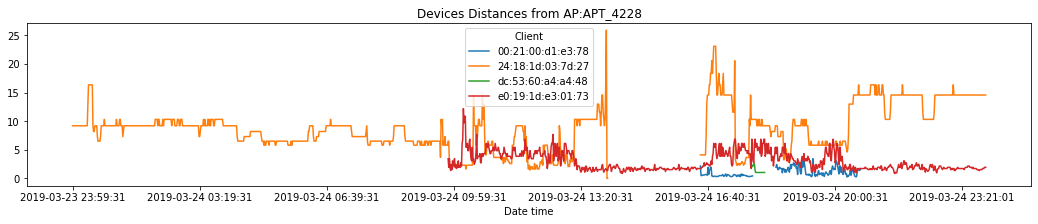

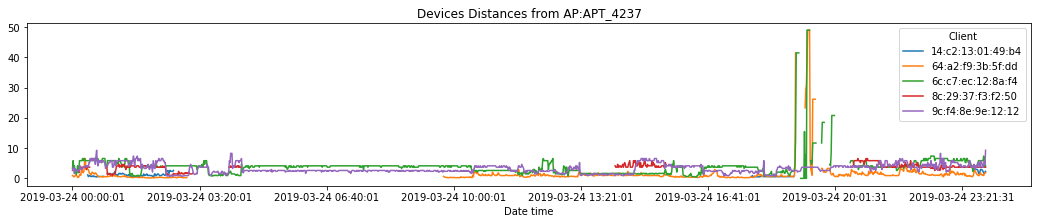

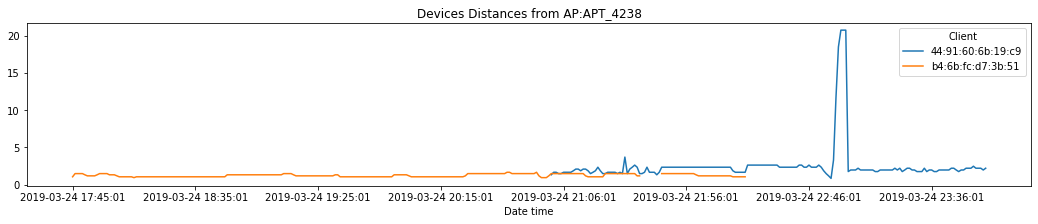

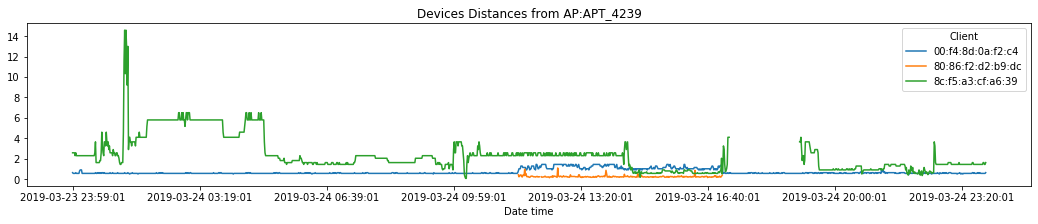

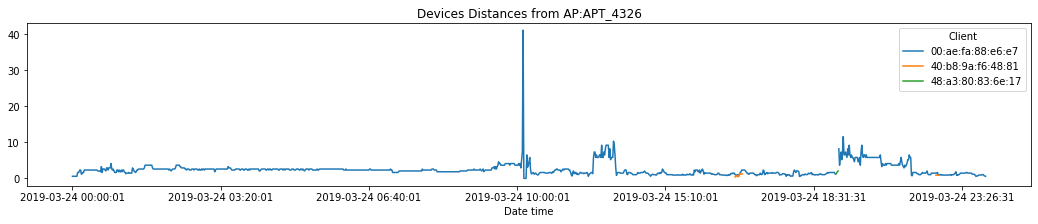

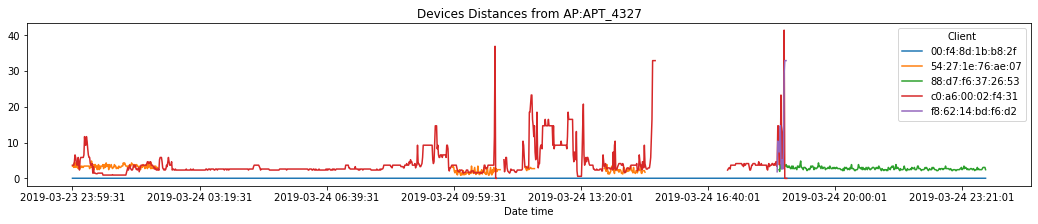

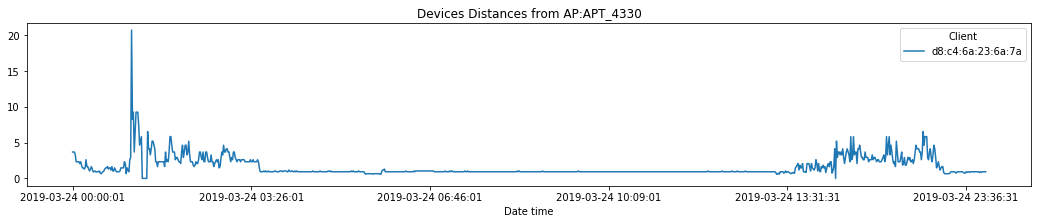

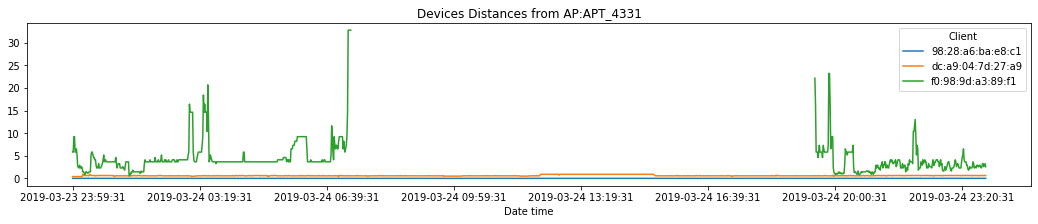

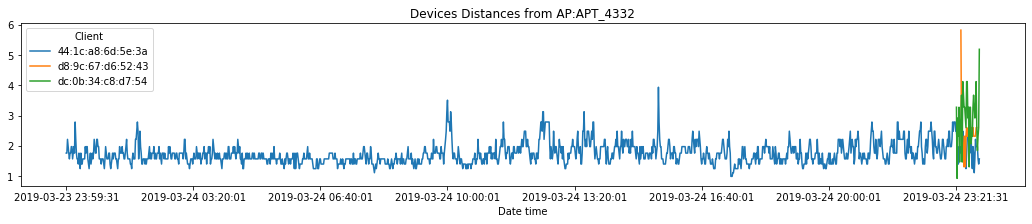

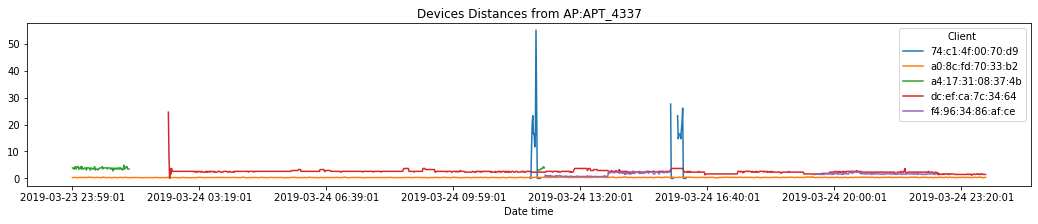

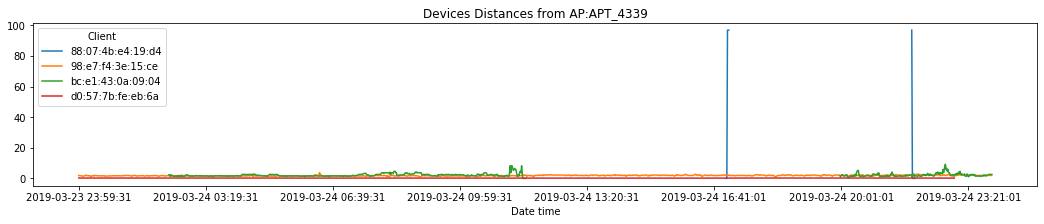

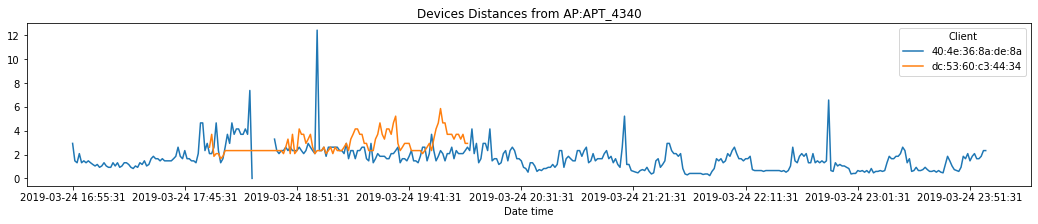

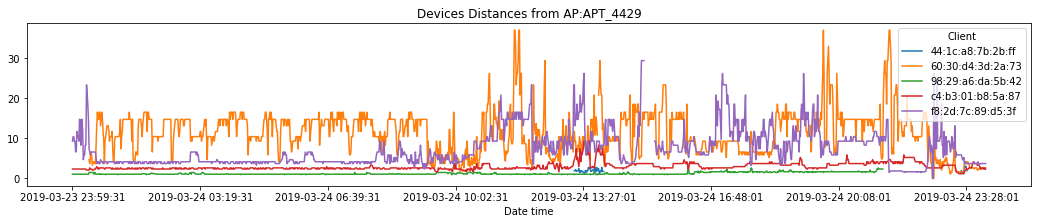

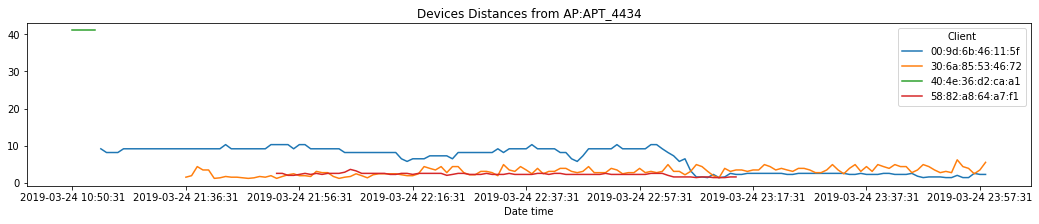

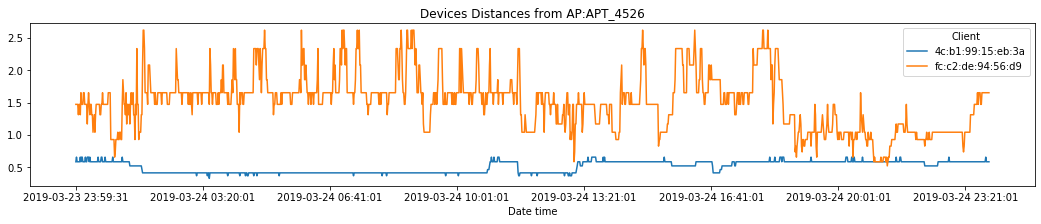

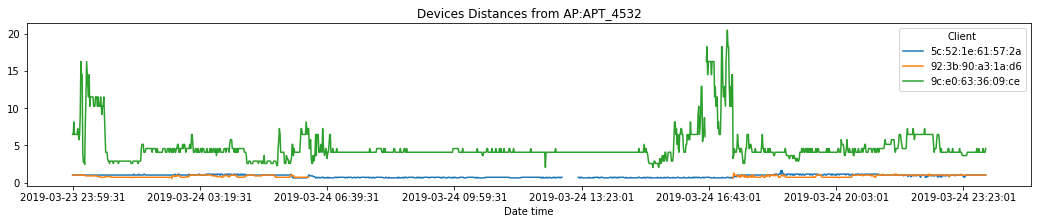

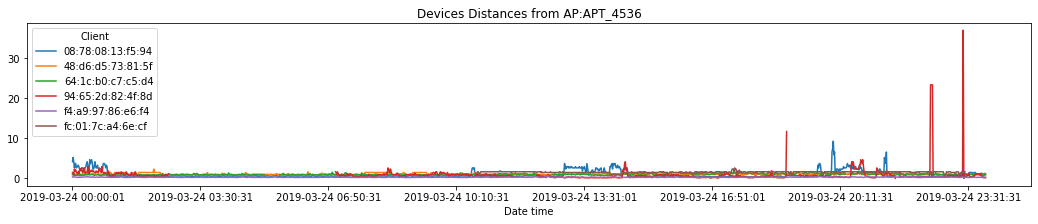

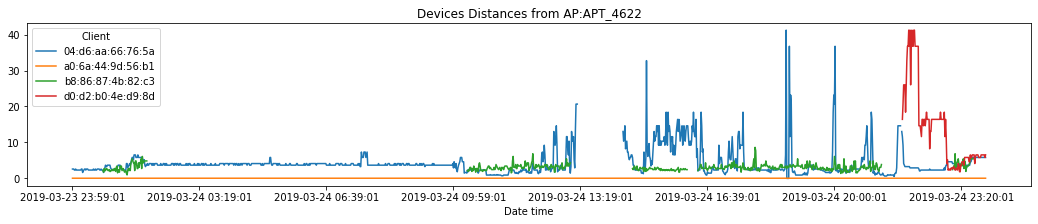

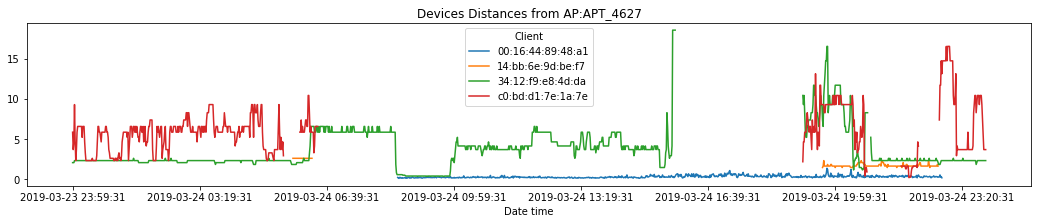

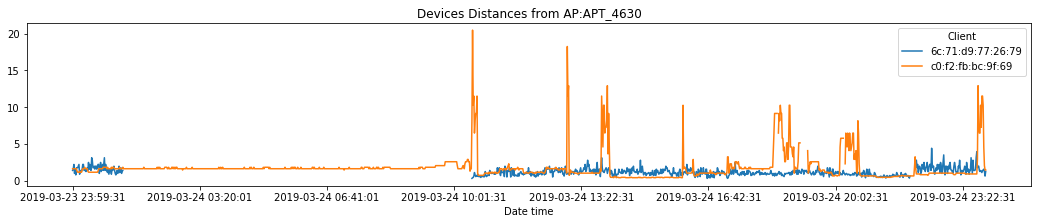

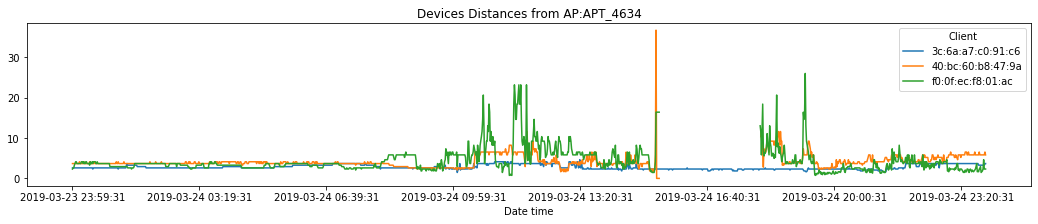

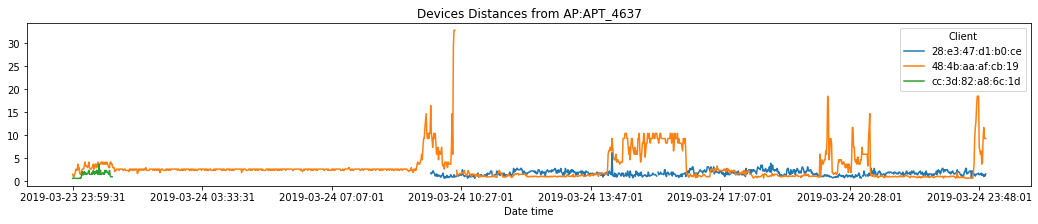

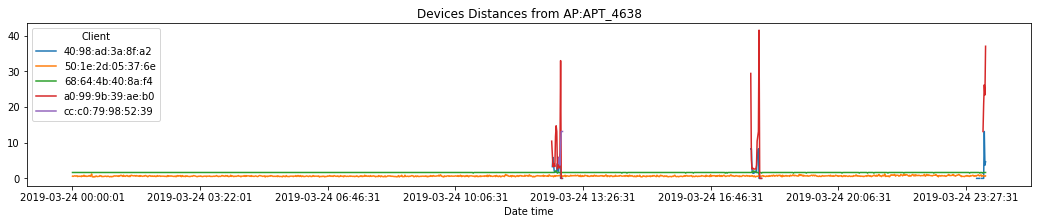

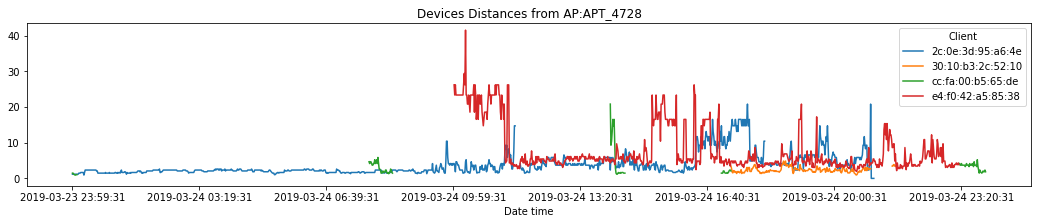

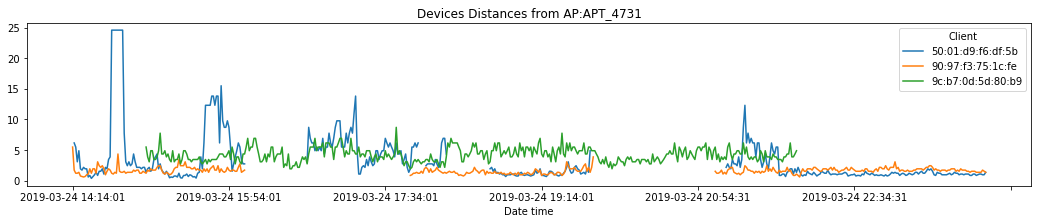

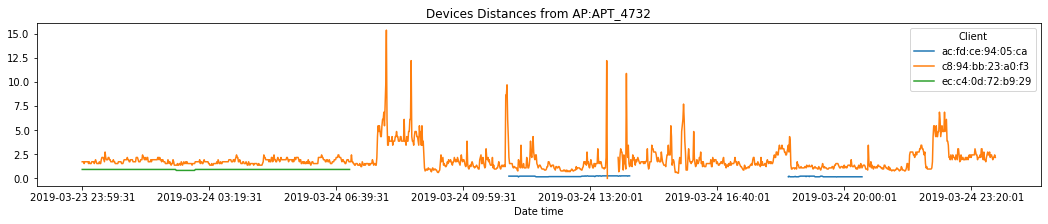

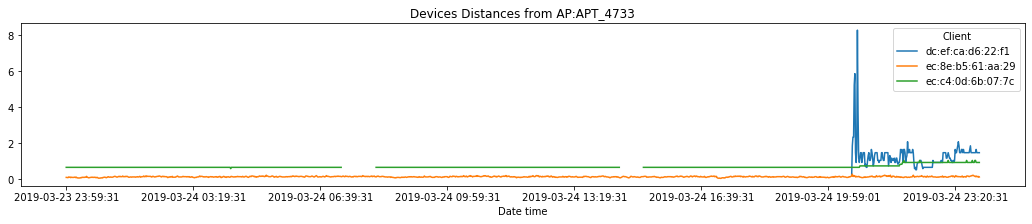

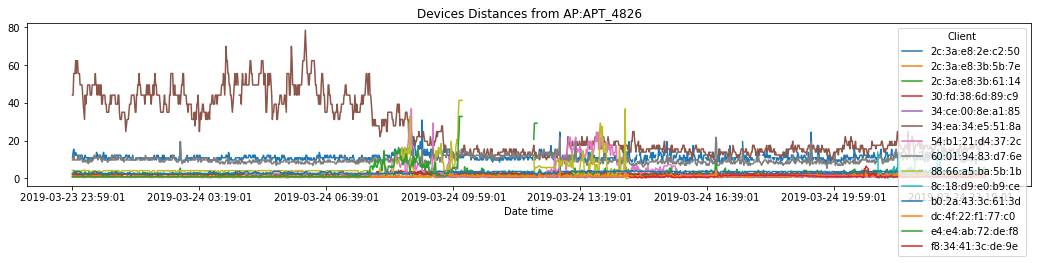

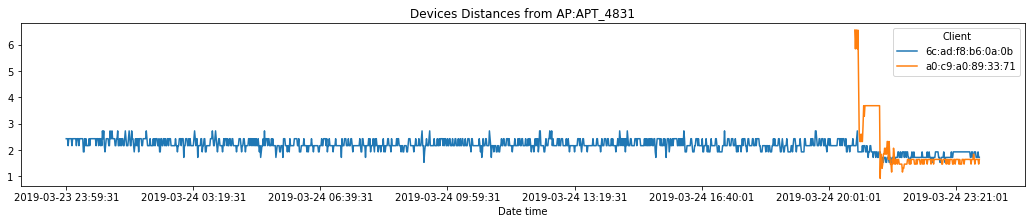

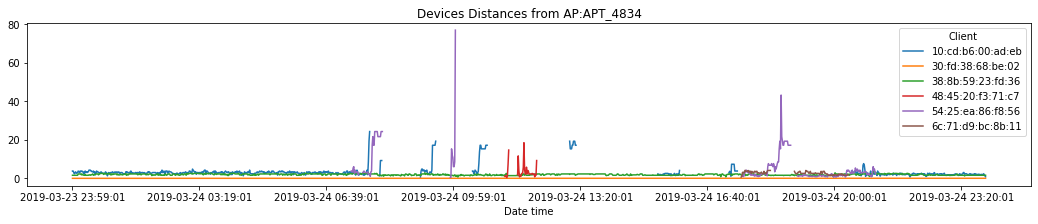

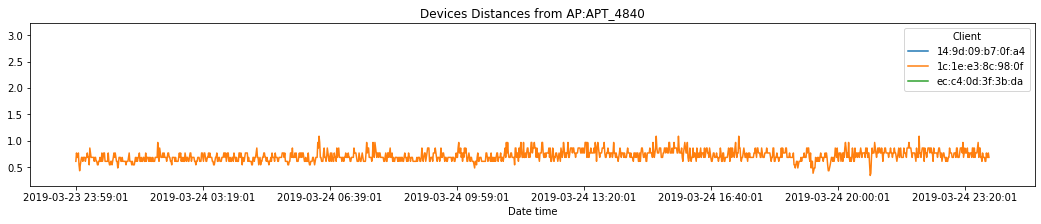

In [9]:
import warnings
warnings.filterwarnings('ignore')

aps = sp_data['ssid'].unique()

for ap in aps:
    ap_data = sp_data[sp_data.ssid==ap] 
    ap_data['distance'] = ap_data.apply(lambda row: calculateDistance(row.signalStrength, row.channelFreq), axis = 1)
    
    ap_data = ap_data.pivot(index='Date time', columns='Client', values='distance')
    ap_data.plot(title = 'Devices Distances from AP:'+ap,figsize=(18,3))

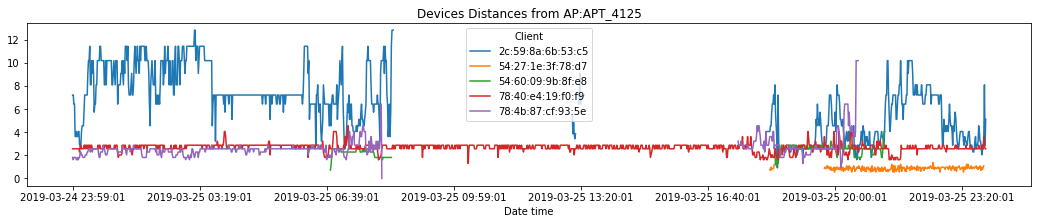

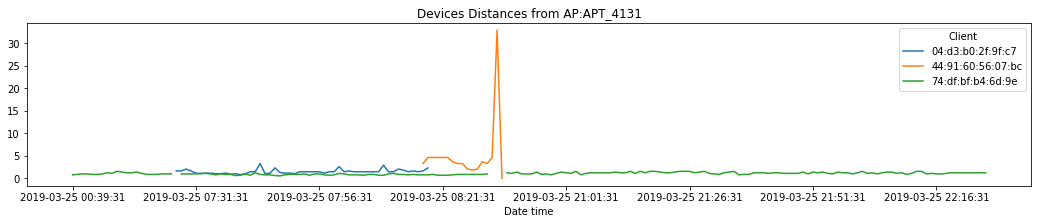

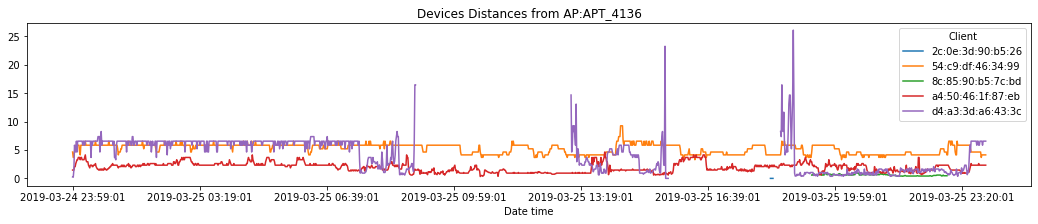

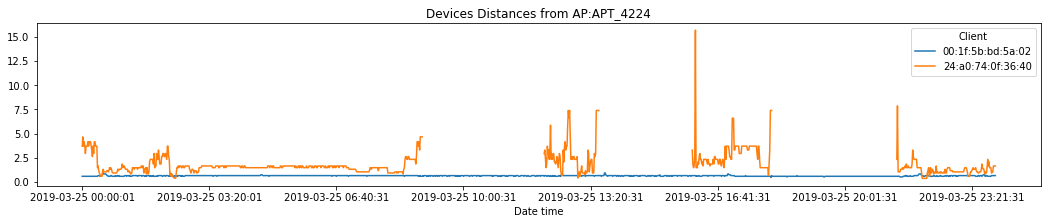

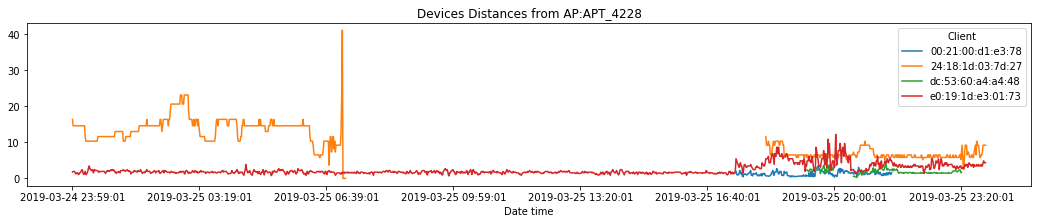

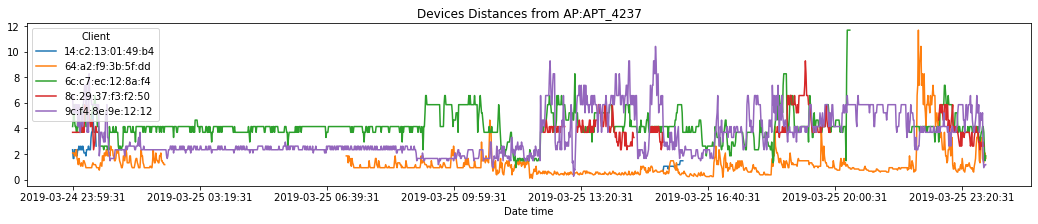

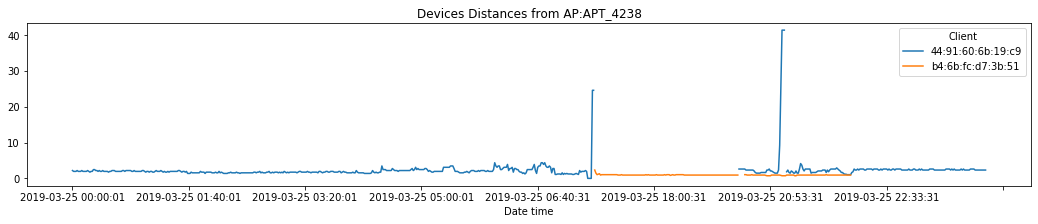

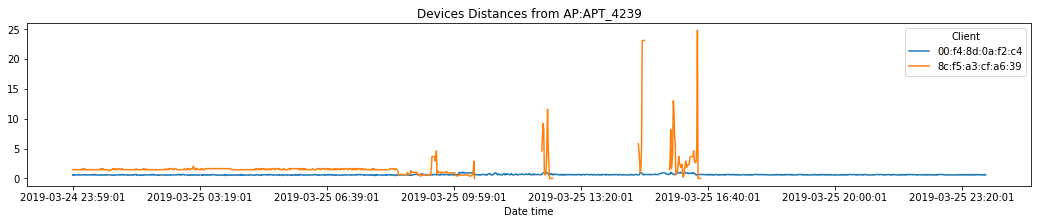

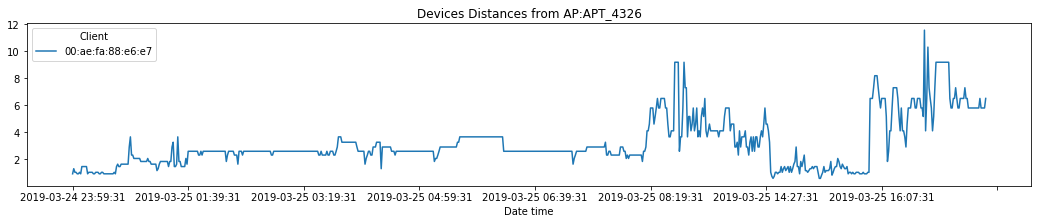

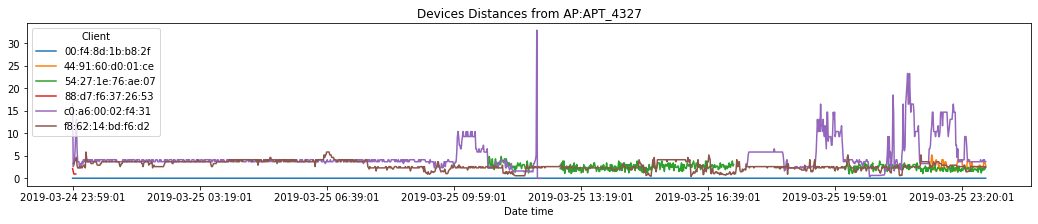

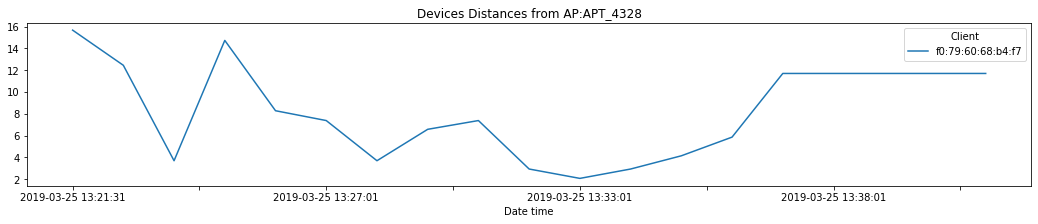

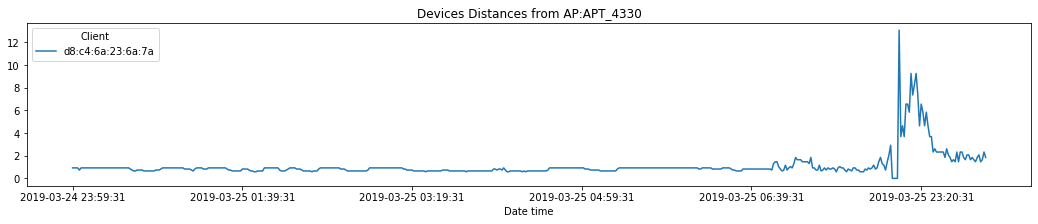

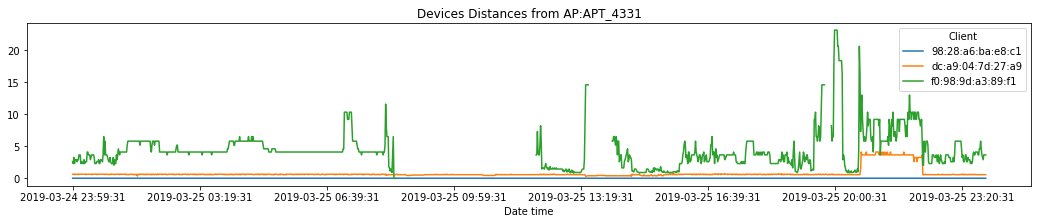

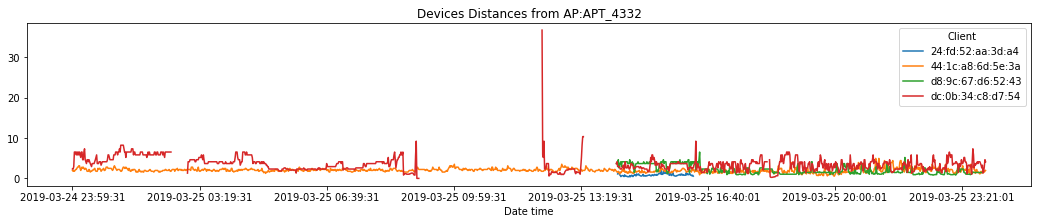

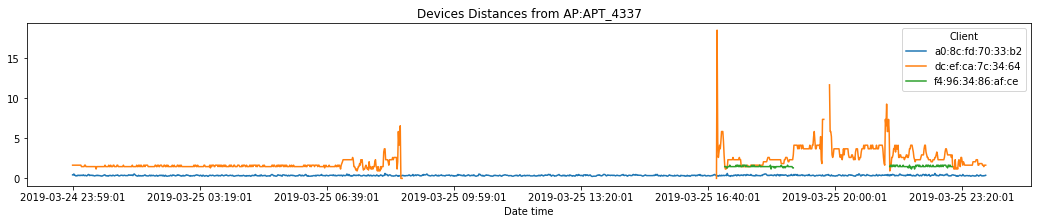

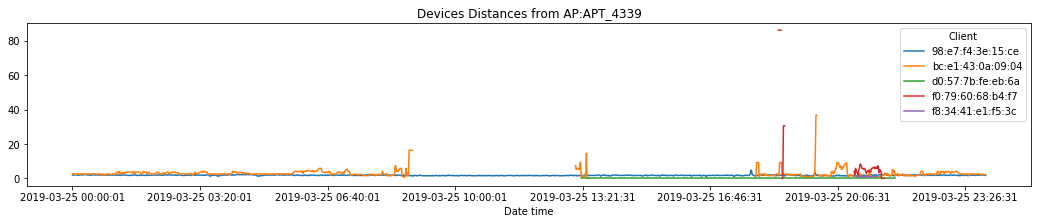

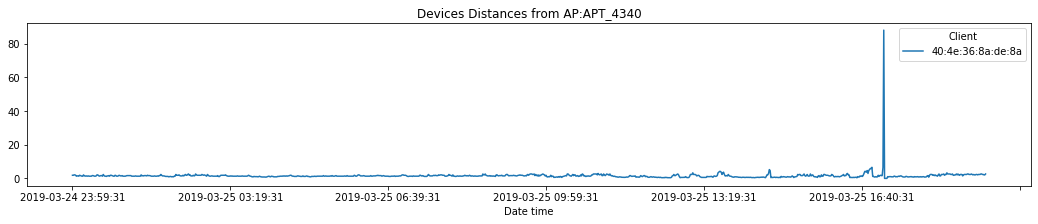

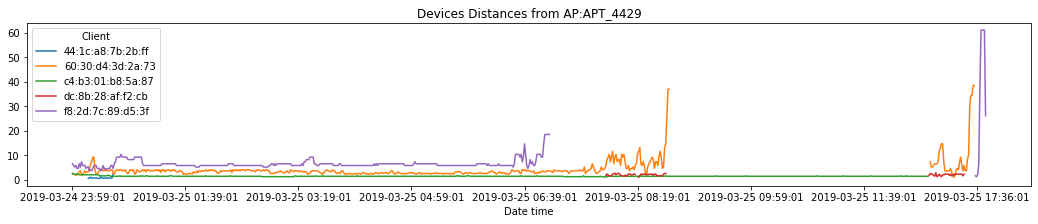

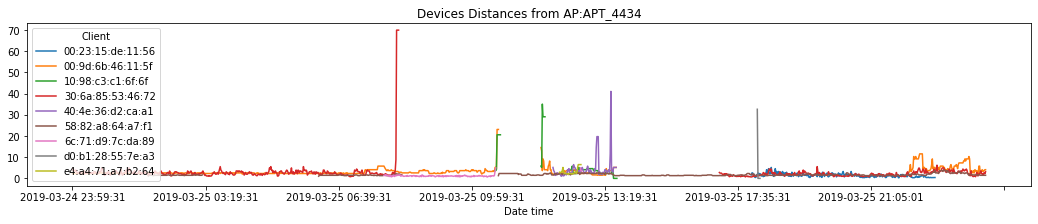

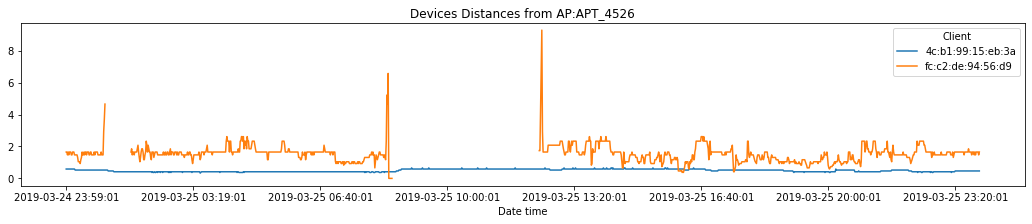

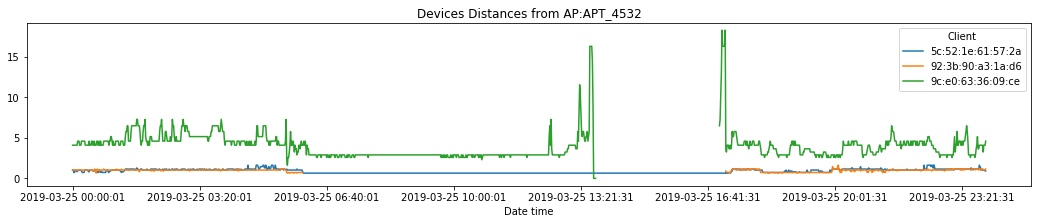

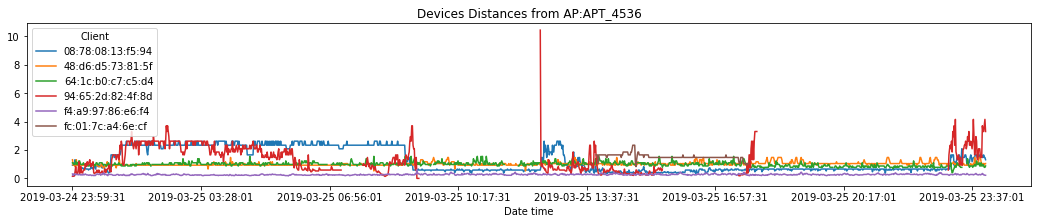

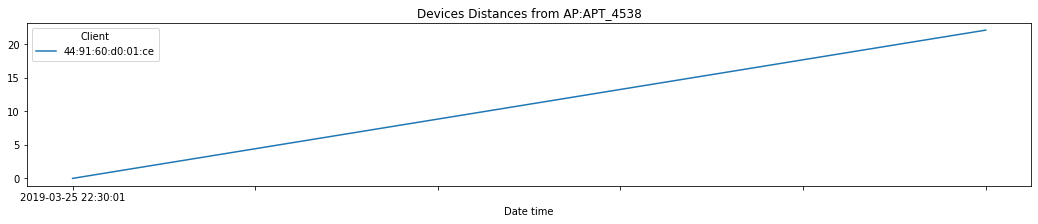

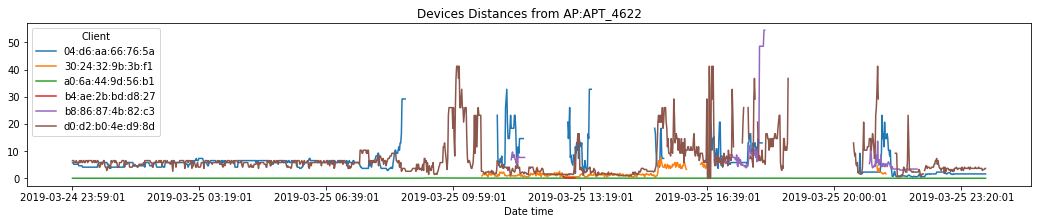

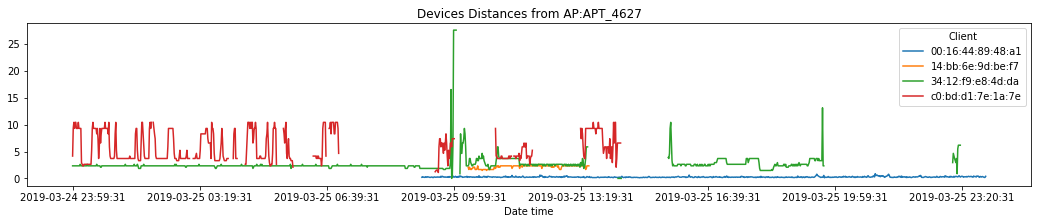

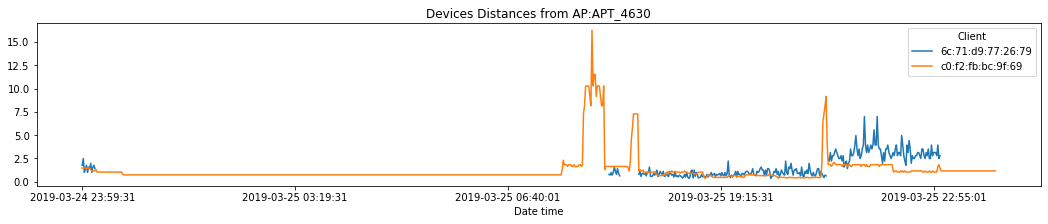

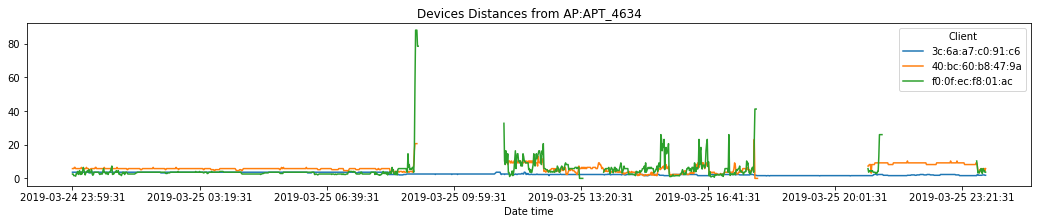

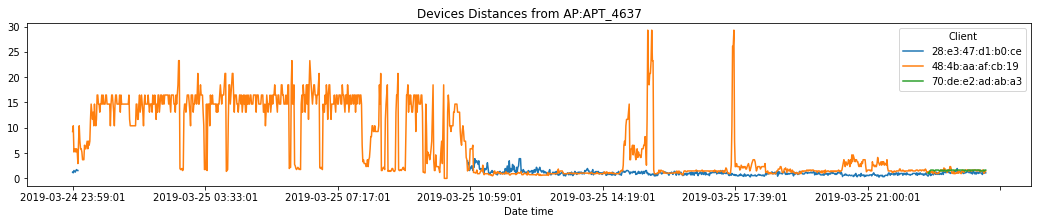

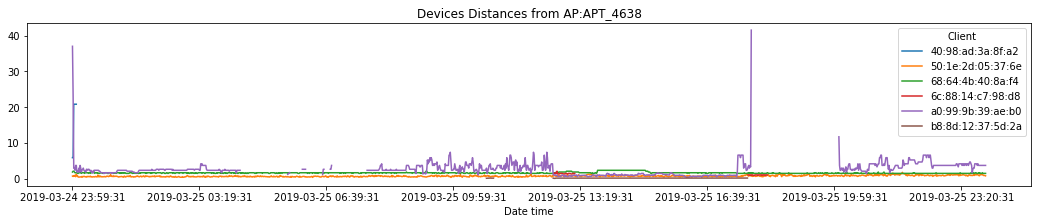

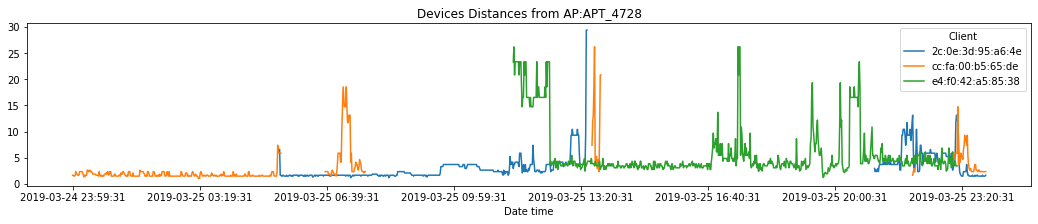

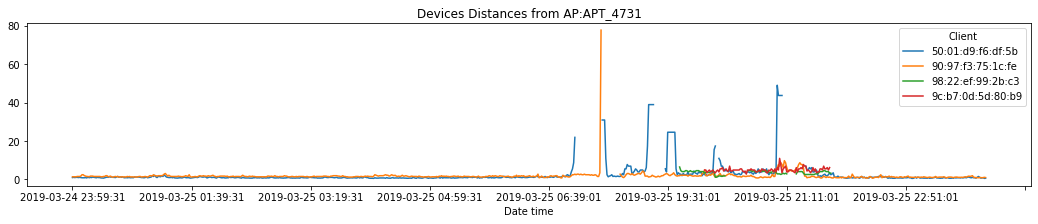

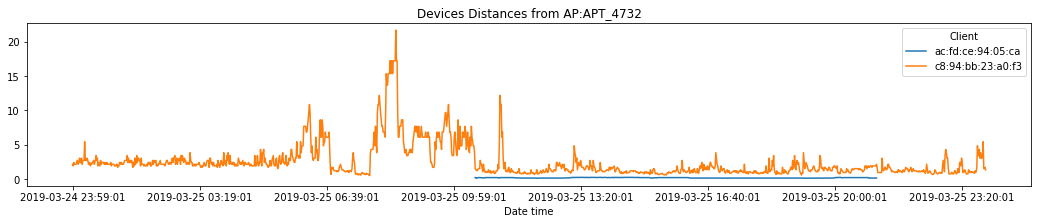

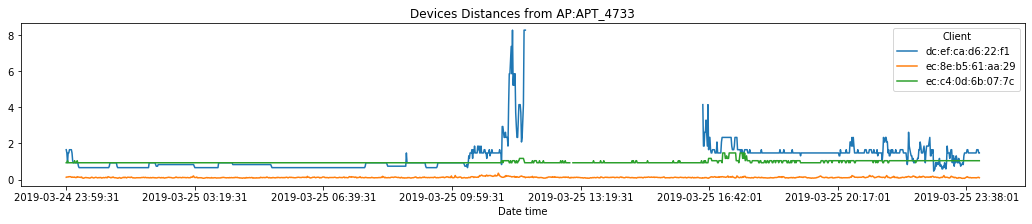

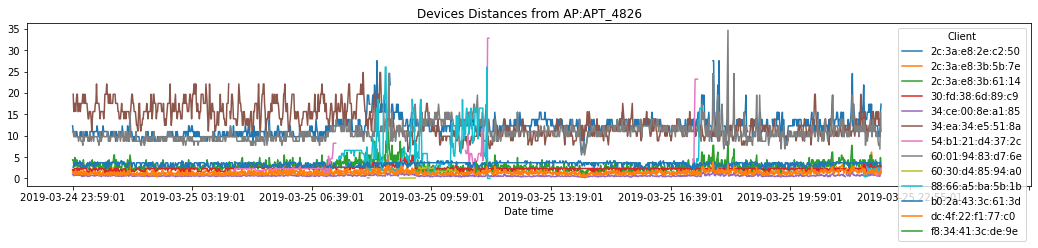

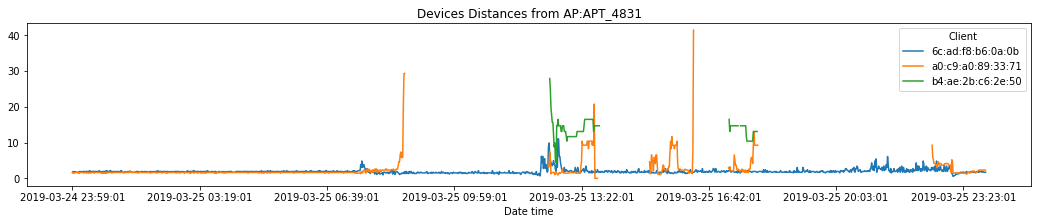

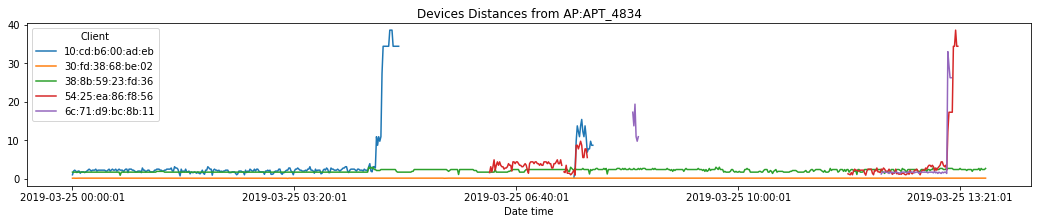

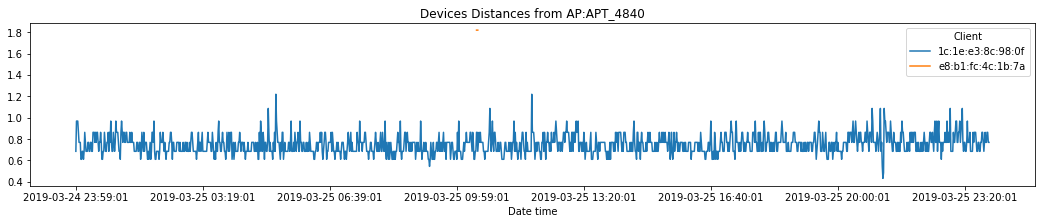

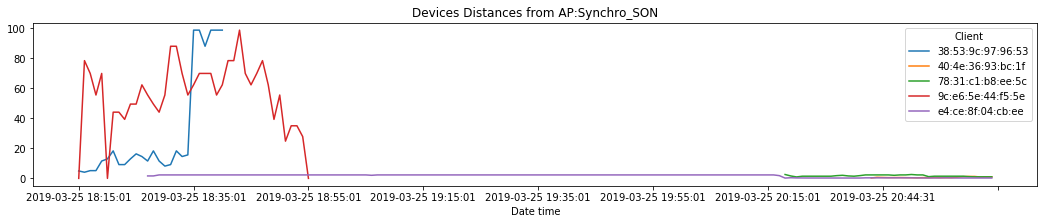

In [10]:
# test with file2
data = data2.copy()
sp_data = data[['ssid','Client','Date time','channelFreq','signalStrength']]
sp_data = sp_data.groupby(['ssid','Client','Date time']).mean().reset_index()
sp_data.sort_values(['Client','Date time'], ascending=True) 

aps = sp_data['ssid'].unique()

for ap in aps:
    ap_data = sp_data[sp_data.ssid==ap] 
    ap_data['distance'] = ap_data.apply(lambda row: calculateDistance(row.signalStrength, row.channelFreq), axis = 1)
    
    ap_data = ap_data.pivot(index='Date time', columns='Client', values='distance')
    ap_data.plot(title = 'Devices Distances from AP:'+ap,figsize=(18,3))